In [1]:
#---------------------------------------------------------------------------------
# https://github.com/open-mmlab/mmrotate/blob/main/demo/MMRotate_Tutorial.ipynb
#---------------------------------------------------------------------------------

In [2]:
import mmcv
import mmrotate
import mmdet
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
# Check mmcv installation
print(mmcv.__version__) #noqa E1101
# Check MMRotate installation
print(mmrotate.__version__)
print(mmrotate.__file__)
# Check MMDetection installation
print(mmdet.__version__)

print(get_compiling_cuda_version())
print(get_compiler_version())

2.0.0
1.0.0rc1
/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/06.Gits/01.SAMRS_MTP/MTP/MMRotate_1_x/mmrotate/mmrotate/__init__.py
3.1.0
11.1
GCC 7.3


In [3]:
import mmengine

In [4]:
# # We use mim to download the pre-trained checkpoints for inference and finetuning.
# !mim download mmrotate --config rotated_rtmdet_tiny-3x-dota --dest .
# !mim download mmrotate --config rotated_rtmdet_l-3x-dota --dest .

In [5]:
from mmengine.config import Config
from mmengine.runner import Runner

from mmdet.utils import register_all_modules as register_all_modules_mmdet
from mmdet.apis import inference_detector, init_detector

from mmrotate.registry import VISUALIZERS
from mmrotate.utils import register_all_modules

In [6]:
# register all modules in mmdet into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules_mmdet(init_default_scope=False)
register_all_modules(init_default_scope=False)

# Choose to use a config and initialize the detector
config = 'rotated_rtmdet_l-3x-dota.py'
# Setup a checkpoint file to load
checkpoint = 'rotated_rtmdet_l-3x-dota-23992372.pth'
# Set work_dir
work_dir = '../work_dirs/rotated_rtmdet_l-3x-dota'
# Set the device to be used for evaluation
device='cuda:0'
# Set inference path
img = './demo.jpg'

cfg = Config.fromfile(config)
cfg.load_from = checkpoint
cfg.work_dir = work_dir

# register all modules in mmrotate into the registries
register_all_modules()

# build the model from a config file and a checkpoint file
model = init_detector(cfg, checkpoint, palette="dota", device=device)
model

Loads checkpoint by local backend from path: rotated_rtmdet_l-3x-dota-23992372.pth


RTMDet(
  (data_preprocessor): DetDataPreprocessor()
  (backbone): CSPNeXt(
    (stem): Sequential(
      (0): ConvModule(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (1): ConvModule(
        (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
      (2): ConvModule(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn): _BatchNormXd(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): SiLU(inplace=True)
      )
    )
    (stage1): Sequential(
      (0): ConvModule(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), pa

In [7]:
model.cfg.visualizer

{'name': 'visualizer',
 'type': 'RotLocalVisualizer',
 'vis_backends': [{'type': 'LocalVisBackend'}]}

/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:831: UserWarning: Warning: The polygon is out of bounds, the drawn polygon may not be in the image
  warnings.warn(
/mnt/hdd/eric/.conda/envs/8.tmp/lib/python3.8/site-packages/mmdet/visualization/palette.py:90: UserWarning: __floordiv__ is deprecated, and its behavior will change

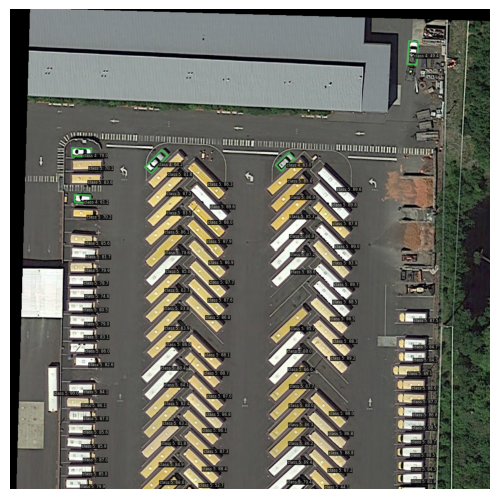

In [8]:
# Use the detector to do inference
img = './demo.jpg'
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')
result = inference_detector(model, img)

visualizer = VISUALIZERS.build(model.cfg.visualizer)
# show the results

visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True,
    wait_time=0,
    pred_score_thr=0.3)
visualizer.show()

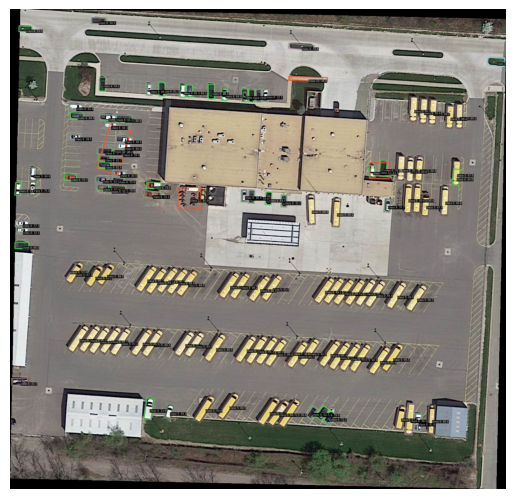

In [9]:
# Use the detector to do inference
from mmrotate.apis import inference_detector_by_patches
img = './dota_demo.jpg'
nms_cfg = dict(type='nms_rotated', iou_threshold=0.1)
result = inference_detector_by_patches(model, img, [512], [500], [0.5,1.0,2.0], nms_cfg)

# show the results
img = mmcv.imread(img)
img = mmcv.imconvert(img, 'bgr', 'rgb')
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    show=True,
    wait_time=0,
    pred_score_thr=0.3)
visualizer.show()